# **What Drives the Price of a Car?**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import itertools
import warnings

**I. Business Understanding**

In this application, we will be exploring a Kaggle dataset containing information on 426K used cars. Our goal is to understand or determine which factors or attributes makes a car more or less expensive.

**II. Data Understanding**

a. Import and explore the vehicles.csv dataset.

b. Familiarize ourselves with the data attributes and contents.

c. Identify key drivers that influence the price of a car

In [2]:
#Import Dataset
#df = pd.read_csv('data/vehicles.csv')
df = pd.read_csv('vehicles.csv')
#Run Descriptive Statistics
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [3]:
#Display Dataset Data Attributes
df.info()
#Display Sample Rows
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


III. Data Preparation

a. Remove unnecessary rows.

b. Remove unnecessary columns.

In [4]:
# Identify rows with null values in the columns.
print(df.isna().sum())

# Drop extraneous columns
columns_to_drop = ['id','region','state','VIN','model']
df_clean = df.drop(columns=columns_to_drop, axis=1)

# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [5]:
# Delete rows that have a null value in the column
for col in ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']:
    df_clean.dropna(subset=[col], inplace=True)
# Delete new cars
df_clean = df_clean[df_clean['condition'] != 'new']
# Delete cars where the price is not between $2,000 and $250,000
df_clean = df_clean.loc[(df['price'] >= 2000) & (df['price'] <= 250000)]
# Delete cars where the odometer is not between 1,000 miles and 500,000 miles
df_clean = df_clean.loc[(df['odometer'] >= 1000) & (df['odometer'] <= 500000)]
# Convert 'Year' Column to Object
df_clean['year'] = df_clean['year'].astype(int).astype(object)
# Convert 'odometer' Column to Integer
df_clean['odometer'] = df_clean['odometer'].astype(int)
# Add ID Column & move it to the front of the dataframe
#df_clean['id'] = range(1, len(df_clean) + 1)
#df_clean = df_clean[['id', 'price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',  'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']]

print(df_clean.isna().sum())
df_clean.describe()
df_clean.info()
df_clean.head(10)

# Export to inspect the clean dataset in Excel
# df_clean.to_csv('data.csv', index=False)

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 54902 entries, 31 to 426833
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         54902 non-null  int64 
 1   year          54902 non-null  object
 2   manufacturer  54902 non-null  object
 3   condition     54902 non-null  object
 4   cylinders     54902 non-null  object
 5   fuel          54902 non-null  object
 6   odometer      54902 non-null  int64 
 7   title_status  54902 non-null  object
 8   transmission  54902 non-null  object
 9   drive         54902 non-null  object
 10  size          54902 non-null  object
 11  type          54902 non-null  object
 12  paint_color   54902 non-null  object
dtypes: int64(2),

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
31,15000,2013,ford,excellent,6 cylinders,gas,128000,clean,automatic,rwd,full-size,truck,black
55,19900,2004,ford,good,8 cylinders,diesel,88000,clean,automatic,4wd,full-size,pickup,blue
59,14000,2012,honda,excellent,6 cylinders,gas,95000,clean,automatic,fwd,full-size,mini-van,silver
65,22500,2001,ford,good,8 cylinders,diesel,144700,clean,manual,rwd,full-size,truck,white
73,15000,2017,dodge,excellent,8 cylinders,gas,90000,rebuilt,automatic,rwd,mid-size,sedan,grey
86,3000,2004,chrysler,good,6 cylinders,gas,176144,clean,automatic,fwd,mid-size,mini-van,silver
110,9500,2003,chrysler,excellent,6 cylinders,gas,30376,clean,automatic,fwd,mid-size,mini-van,blue
119,17500,2008,toyota,good,6 cylinders,gas,201300,clean,manual,4wd,full-size,offroad,black
138,4000,2006,jeep,good,6 cylinders,gas,281000,clean,automatic,rwd,mid-size,SUV,black
177,22950,2014,ford,excellent,8 cylinders,gas,166380,clean,automatic,4wd,full-size,truck,black


<Axes: title={'center': 'Odometer vs Price'}, xlabel='Odometer (Miles)', ylabel='Price (\\$)'>

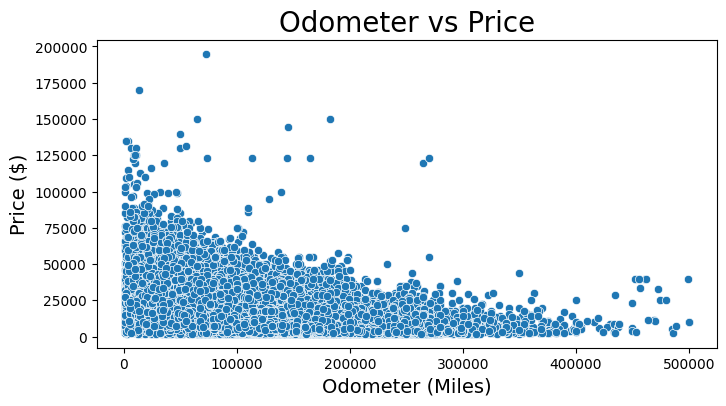

In [6]:
# As expected, lower mileage cars are sold for higher than higher mileage cars.

plt.figure(figsize=(8, 4))
plt.title("Odometer vs Price", fontsize=20)
plt.xlabel("Odometer (Miles)", fontsize=14)
plt.ylabel("Price (\$)", fontsize=14)
sns.scatterplot(data=df_clean, x="odometer", y="price")

<Axes: title={'center': 'Year vs Price'}, xlabel='Year', ylabel='Price (\\$)'>

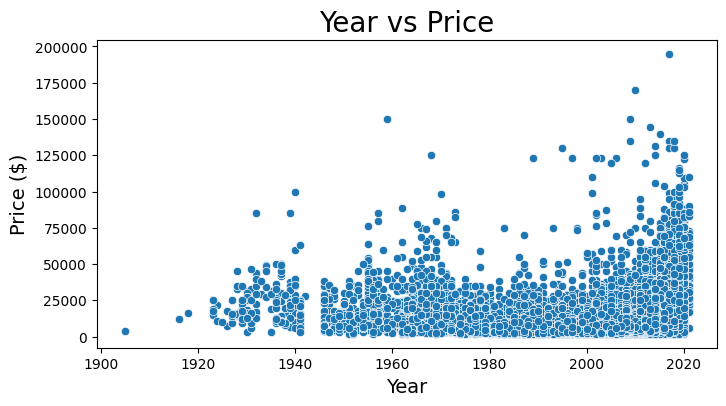

In [7]:
# There doesn't appear to be a strong correlation between price and year.

plt.figure(figsize=(8, 4))
plt.title("Year vs Price", fontsize=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price (\$)", fontsize=14)
sns.scatterplot(data=df_clean, x="year", y="price")

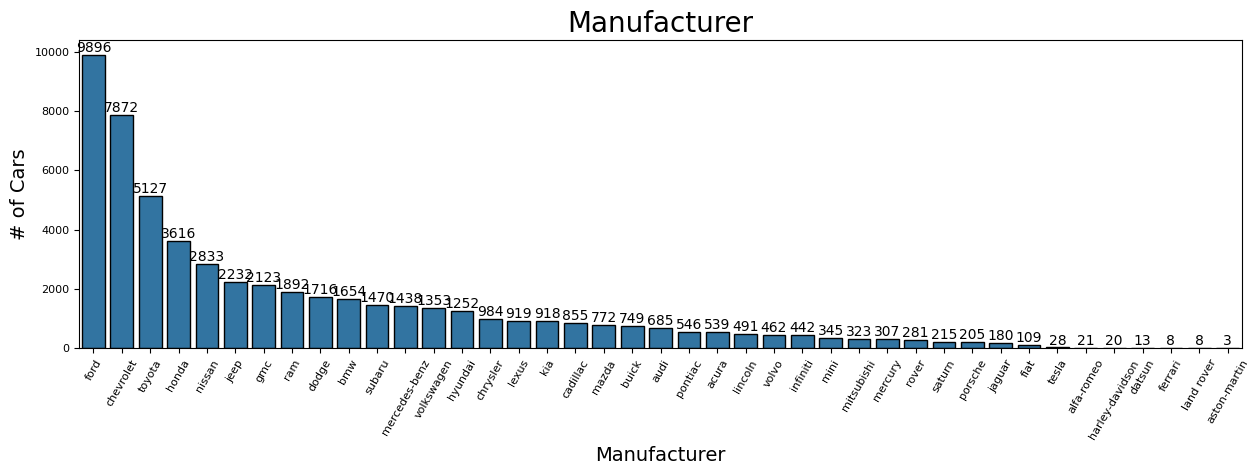

In [8]:
# The most popular cars manufacturers are Ford, Chevy, Toyota, Honda, and Nissan.
# Luxury car manufacturers such as BMW, Mercedes-Benz, Porsche, and Ferrari to name a few aren't as popular.

plt.figure(figsize = (15, 4))
manufacturer_counts = df_clean['manufacturer'].value_counts()
ax=sns.countplot(data=df_clean, x=df_clean.manufacturer, ec='black', order=manufacturer_counts.index)
for cont in ax.containers:
    ax.bar_label(cont)
plt.title("Manufacturer", fontsize=20)
plt.ylabel('# of Cars', fontsize=14)
plt.yticks(size=8)
plt.xlabel('Manufacturer', fontsize=14)
plt.xticks(size=8)
plt.xticks(rotation=60)
plt.show()

In [9]:
# As expected, the average price and median price for "Like New" cars are higher than "Excellent" cars.
# "Excellent" cars were higher than "Good" cars.
# "Good" cars were higher than "Fair" cars.
# What was unexpected however were "Salvage" cars were higher than "Fair" cars.
# But for the most part, better conditioned cars are more expensive than lesser conditioned cars.

a = df_clean.query("condition == 'like new'")
b = a.price.mean()
c = a.price.median()
print("Like New Condition Mean Price: " + str("${:,.0f}".format(int(b))), "  Like New Condition Median Price: " + str("${:,.0f}".format(int(c))))

a = df_clean.query("condition == 'excellent'")
b = a.price.mean()
c = a.price.median()
print("Excellent Condition Mean Price: " + str("${:,.0f}".format(int(b))), " Excellent Condition Median Price: " + str("${:,.0f}".format(int(c))))

a = df_clean.query("condition == 'good'")
b = a.price.mean()
c = a.price.median()
print("Good Condition Mean Price: " + str("${:,.0f}".format(int(b))), "       Good Condition Median Price: " + str("${:,.0f}".format(int(c))))

a = df_clean.query("condition == 'fair'")
b = a.price.mean()
c = a.price.median()
print("Fair Condition Mean Price: " + str("${:,.0f}".format(int(b))), "       Fair Condition Median Price: " + str("${:,.0f}".format(int(c))))

a = df_clean.query("condition == 'salvage'")
b = a.price.mean()
c = a.price.median()
print("Salvage Condition Mean Price: " + str("${:,.0f}".format(int(b))), "    Salvage Condition Median Price: " + str("${:,.0f}".format(int(c))))

Like New Condition Mean Price: $19,421   Like New Condition Median Price: $14,900
Excellent Condition Mean Price: $14,295  Excellent Condition Median Price: $10,990
Good Condition Mean Price: $9,537        Good Condition Median Price: $6,950
Fair Condition Mean Price: $5,103        Fair Condition Median Price: $3,800
Salvage Condition Mean Price: $6,875     Salvage Condition Median Price: $5,700


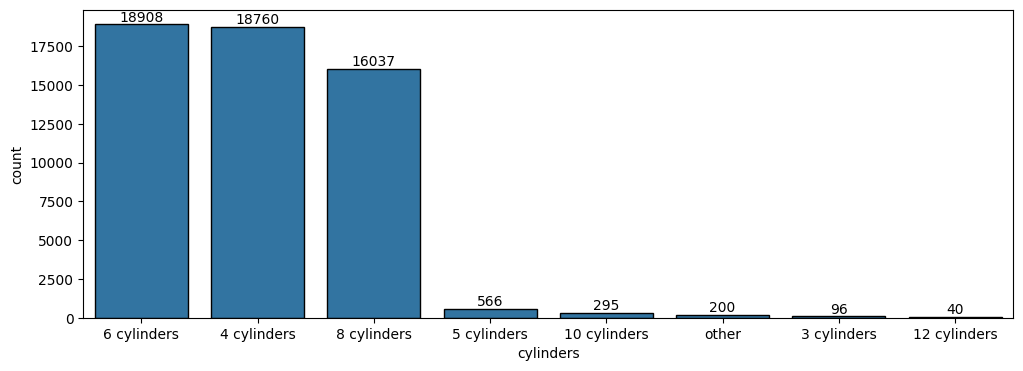

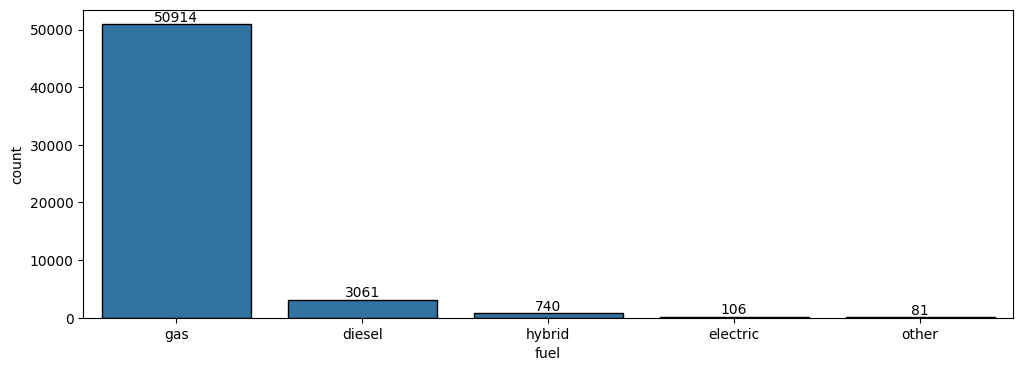

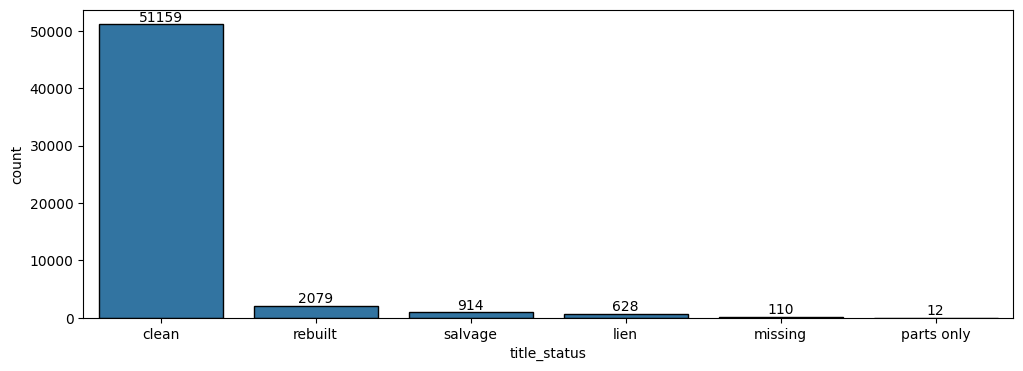

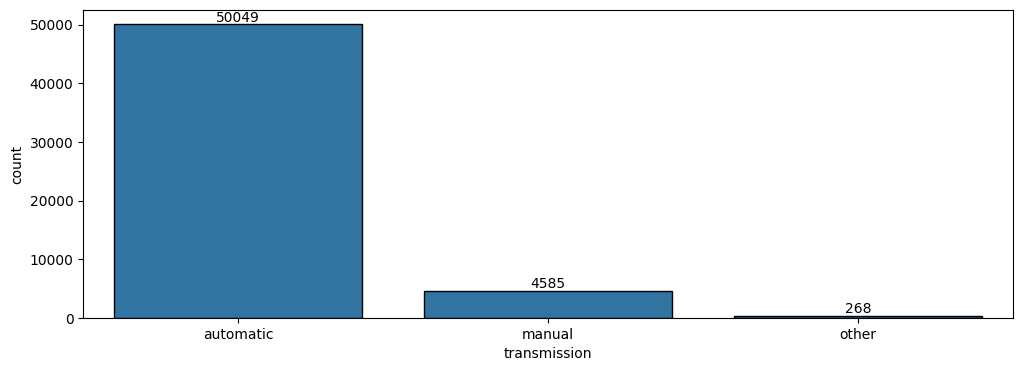

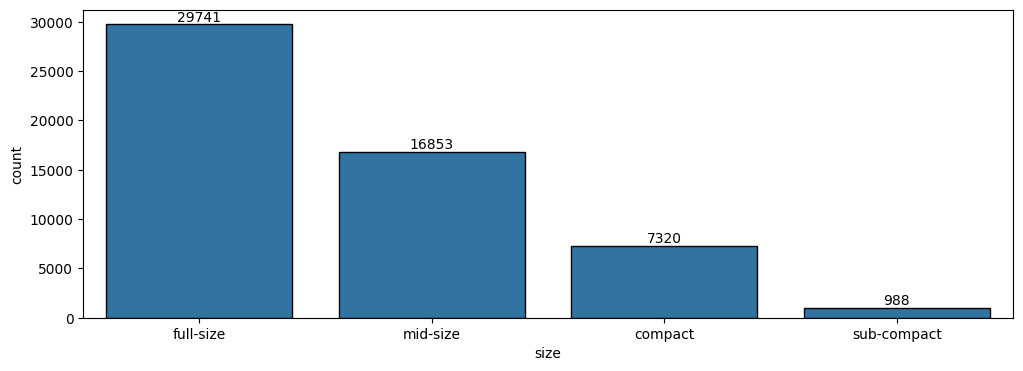

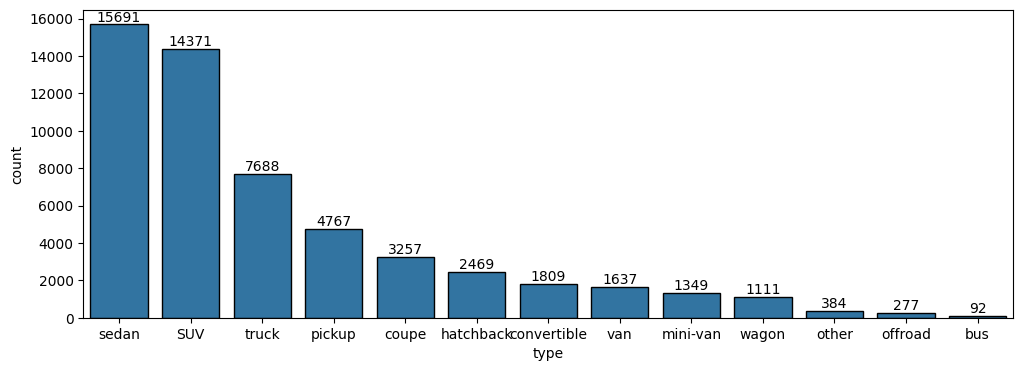

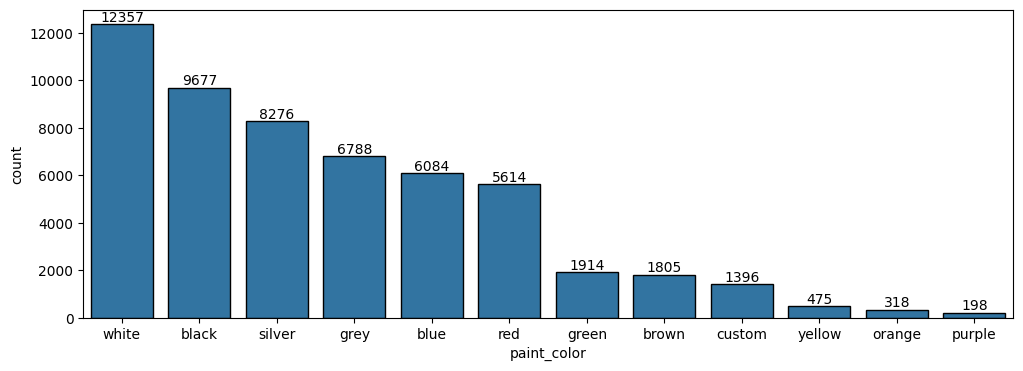

In [10]:
#CountPlot of Categorical Data

columns = ["cylinders","fuel","title_status","transmission","size","type","paint_color"]
for i in columns:
    fig = plt.figure(figsize =[12,4])
    i_counts = df_clean[i].value_counts()
    ax = sns.countplot(data=df_clean, x=i, ec='black', order=i_counts.index)
    for cont in ax.containers:
      ax.bar_label(cont)
    plt.xlabel(i)
    plt.show()

In [ ]:
sns.pairplot(df_clean)
plt.show()

IV. Modeling

In [ ]:
columns_to_drop = ['manufacturer', 'cylinders', 'title_status', 'drive', 'size', 'type', 'paint_color']
df_clean_ohe = df_clean.drop(columns=columns_to_drop, axis=1)

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_clean_ohe[["condition", "fuel", "transmission"]])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["condition", "fuel", "transmission"]))
df_clean_ohe = pd.concat([df_clean_ohe.drop(["condition", "fuel", "transmission"], axis=1), encoded_df], axis=1)
df_clean_ohe.dropna(inplace=True)

df_clean_ohe.columns
df_clean_ohe.head(10)

#print(f"One-Hot Encoded Data using Scikit-Learn:\n{df_clean_ohe}\n")

In [ ]:
# Let's build a better model. A score of 0.26 isn't cutting it.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['price', 'year', 'odometer']
df_clean_ohe[num_vars] = scaler.fit_transform(df_clean_ohe[num_vars])
df_clean_ohe.head(10)

In [ ]:
# RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df_clean_ohe.drop('price', axis= 1)
y = df_clean_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
rfe = RFE(model, n_features_to_select=7)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col
X_train.columns[~rfe.support_]
X_train_rfe = X_train[col]

In [ ]:
#VIF Check

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Less drop 'fuel_hybrid', 'transmission_other', and 'condition_salvage' since the p-values are high

df_clean_ohe_new = df_clean_ohe[['price', 'year', 'odometer', 'fuel_diesel', 'transmission_manual']]

V. Evaluation

In [ ]:
# Linear Regression
X = df_clean_ohe_new.drop('price', axis= 1)
y = df_clean_ohe_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)

print('Score:   ', result)
print('X Train: ', X_train.shape)
print('X Test:  ', X_test.shape)
print('y Train: ', y_train.shape)
print('y Test:  ', y_test.shape)

VI. Deployment

Factors that drive car sales are what we expected:
1. Newer model cars sold well.
2. People prefered diesel cars over other fuel type cars.
3. People also preferred lower mileage cars as well.